# Analisis Exploratorio de los Datos

Después de limpiar los datos, vamos a investigar las relaciones entre las variables de los conjuntos de datos para identificar patrones significativos que valga la pena explorar. Comenzaremos importando las librerías que utilizaremos.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

### Descripción de los datos

Vamos a cargar los conjuntos de datos y utilizaremos la función **describe()** para observar algunas características de las columnas numéricas.

In [8]:
df_user_reviews = pd.read_csv('../Data/Data-Limpia/user_reviews.csv')
df_user_reviews.head(3)

,user_id,posted,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,No ratings yet,True,2
1,76561197970982479,2011-07-15,22200,No ratings yet,True,2
2,76561197970982479,2011-04-21,43110,No ratings yet,True,2


In [9]:
df_user_reviews.describe(include='all')

,user_id,posted,item_id,helpful,recommend,sentiment_analysis
count,58431,48498,58431.000000,58431,58431,58431.000000
unique,25458,1644,NaN,1344,2,NaN
top,76561198108415635,2014-06-21,NaN,No ratings yet,True,NaN
freq,10,220,NaN,29732,51692,NaN
mean,NaN,NaN,169703.670586,NaN,NaN,1.350875
std,NaN,NaN,132019.789420,NaN,NaN,0.810786
min,NaN,NaN,10.000000,NaN,NaN,0.000000
25%,NaN,NaN,8930.000000,NaN,NaN,1.000000
50%,NaN,NaN,218230.000000,NaN,NaN,2.000000
75%,NaN,NaN,261640.000000,NaN,NaN,2.000000


In [10]:
df_steam_games = pd.read_csv('../Data/Data-Limpia/steam_games.csv')
df_steam_games.head(3)

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,Strategy,Single-player,4.99,False,761140,Kotoshiro
1,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,Action,Single-player,4.99,False,761140,Kotoshiro
2,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,Indie,Single-player,4.99,False,761140,Kotoshiro


In [11]:
df_steam_games.describe(include='all')

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer
count,1746644,2001732,2005581,2005581,1991826,2005269,2002265,1.753193e+06,2005581,2.005581e+06,1994881
unique,8236,22,30054,30054,3462,337,31,NaN,2,NaN,10992
top,KISS ltd,Indie,ARM PLANETARY PROSPECTORS Asteroid Resource Mi...,ARM PLANETARY PROSPECTORS Asteroid Resource Mi...,2016-06-16,Indie,Single-player,NaN,False,NaN,"SmiteWorks USA, LLC"
freq,31652,455536,1980,1980,6561,215710,379650,NaN,1775964,NaN,45621
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.142645e+01,NaN,4.285950e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.405399e+01,NaN,1.668233e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900000e-01,NaN,1.000000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.990000e+00,NaN,3.115600e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.990000e+00,NaN,4.158600e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.499000e+01,NaN,5.536700e+05,NaN


In [12]:
df_users_items = pd.read_csv('../Data/Data-Limpia/users_items.csv')
df_users_items.head(3)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7.0,0.0


In [13]:
df_users_items.describe(include='all')

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
count,5094105,5.094105e+06,5.094105e+06,5094105,5.094105e+06,5094105,5.094105e+06,5.094105e+06
unique,70912,NaN,NaN,70912,NaN,10947,NaN,NaN
top,phrostb,NaN,NaN,http://steamcommunity.com/id/phrostb,NaN,Dota 2 Test,NaN,NaN
freq,7762,NaN,NaN,7762,NaN,49136,NaN,NaN
mean,NaN,3.157324e+02,7.656120e+16,NaN,1.783916e+05,NaN,9.905511e+02,9.069004e+00
std,NaN,6.969073e+02,3.917652e+07,NaN,1.318516e+05,NaN,5.414297e+03,1.403145e+02
min,NaN,1.000000e+00,7.656120e+16,NaN,1.000000e+01,NaN,0.000000e+00,0.000000e+00
25%,NaN,7.100000e+01,7.656120e+16,NaN,3.445000e+04,NaN,0.000000e+00,0.000000e+00
50%,NaN,1.370000e+02,7.656120e+16,NaN,2.144200e+05,NaN,3.400000e+01,0.000000e+00
75%,NaN,2.750000e+02,7.656120e+16,NaN,2.664300e+05,NaN,3.550000e+02,0.000000e+00


### Agrupamiento de Datos

Vamos a unir los datos relacionados con los juegos y las reseñas de los usuarios para luego proceder a realizar agrupaciones de variables. De esta manera, podremos obtener más información detallada de nuestros conjuntos de datos combinados.

In [14]:
df_games_reviews= pd.merge(df_steam_games,df_user_reviews,left_on='id',right_on='item_id', how='inner')
df_games_reviews.head(3)

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,user_id,posted,item_id,helpful,recommend,sentiment_analysis
0,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,Racing,Single-player,9.99,False,282010,Stainless Games Ltd,InstigatorAU,NaN,282010,No ratings yet,True,1
1,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,Racing,Multi-player,9.99,False,282010,Stainless Games Ltd,InstigatorAU,NaN,282010,No ratings yet,True,1
2,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,Racing,Steam Trading Cards,9.99,False,282010,Stainless Games Ltd,InstigatorAU,NaN,282010,No ratings yet,True,1


Text(0, 0.5, 'Genero')

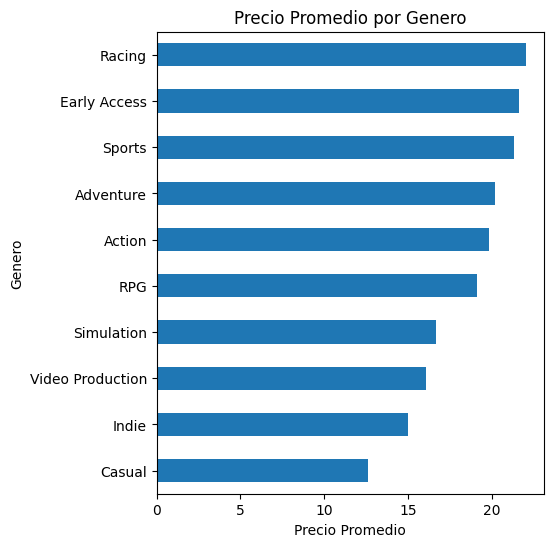

In [26]:
precio_promedio_genero = df_games_reviews.groupby('genres')['price'].mean().sort_values(ascending=True).head(10)
plt.figure(figsize=(5,6))
precio_promedio_genero.plot(kind='barh')
plt.title('Precio Promedio por Genero')
plt.xlabel('Precio Promedio')
plt.ylabel('Genero')

La gráfica anterior nos muestra un grupo de 10 géneros con el mayor precio promedio de juegos. Esto sugiere que los juegos pertenecientes a estos géneros podrían ser los más caros en la plataforma.

In [45]:
df_recomendados = df_games_reviews[['title','recommend','sentiment_analysis']].copy()
df_recomendados.head(3)

,title,recommend,sentiment_analysis
0,Carmageddon Max Pack,True,1
1,Carmageddon Max Pack,True,1
2,Carmageddon Max Pack,True,1


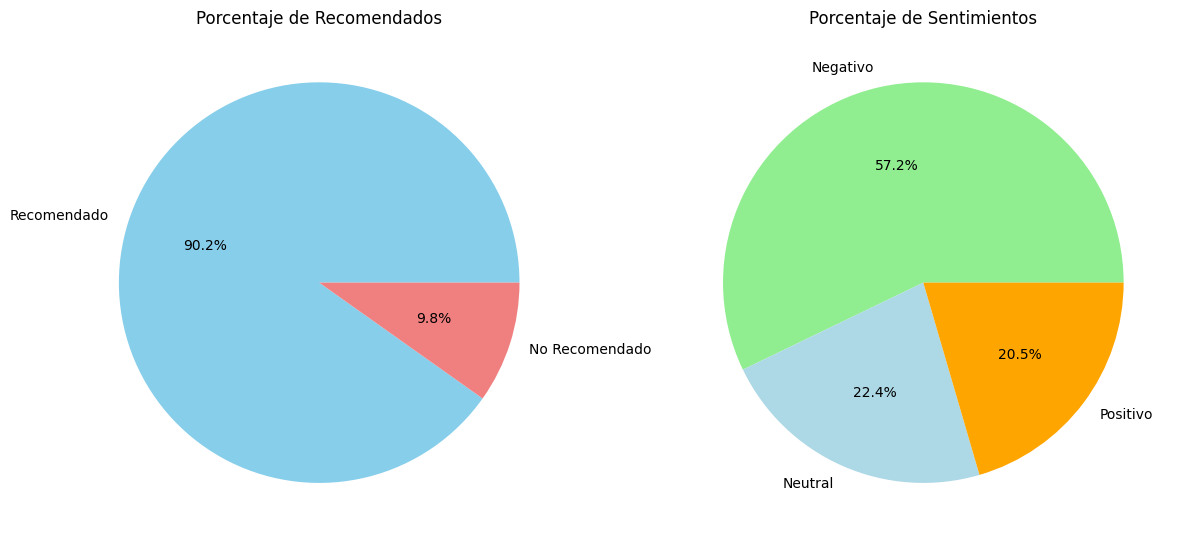

In [49]:
# Obtener conteo de valores en cada columna
conteo_recomendado = df_recomendados['recommend'].value_counts(normalize=True) * 100
conteo_sentimiento = df_recomendados['sentiment_analysis'].value_counts(normalize=True) * 100

# Configuración para la gráfica de pastel de 'recomendado'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(conteo_recomendado, labels=['Recomendado', 'No Recomendado'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Recomendados')

# Configuración para la gráfica de pastel de 'sentimiento'
plt.subplot(1, 2, 2)
plt.pie(conteo_sentimiento, labels=['Negativo', 'Neutral', 'Positivo'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'orange'])
plt.title('Porcentaje de Sentimientos')

plt.tight_layout()
plt.show()

En los gráficos anteriores, se observa que la mayoría de los usuarios que prueban un juego en la plataforma suelen recomendarlo. Sin embargo, también existe un gran porcentaje de reseñas negativas para los juegos de la plataforma. Estas características tendrán un impacto importante en nuestro modelo.